In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import os
import pickle
import blosc

from pprint import pprint
import re

from openbabel import openbabel as ob

## Reading and Visualising of some bond lengths

In [159]:
bond_lengths={}

with open("cod-crest_bond_lengths_.pkl", "rb") as f:
    compressed_pickle = f.read()

#depressed_pickle = blosc.decompress(compressed_pickle)
bond_lengths.update(pickle.loads(compressed_pickle))

In [160]:
len(bond_lengths['C - C , 2.0'])

529

In [162]:
max(bond_lengths['C - C , 2.0'][:,0])

1.5305

In [163]:
min(bond_lengths['C - C , 2.0'][:,0])

1.2508

In [165]:
np.mean(bond_lengths['C - C , 1.0'][:,0])

1.5193639233370915

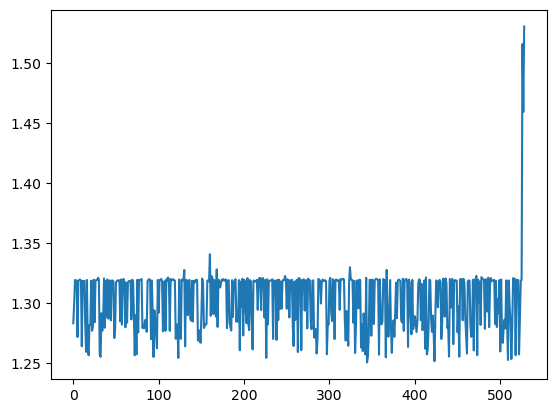

In [167]:
plt.plot(np.array(bond_lengths['C - C , 2.0'])[:,0])

In [171]:
#Bond Length, Charge on Atom1, Charge on Atom2, BondOrder
bond_lengths['C - C , 2.0'][:10]

array([[ 1.2834    ,  0.01988465, -0.05107239,  2.05      ],
       [ 1.2986    ,  0.03410501, -0.1081543 ,  1.99      ],
       [ 1.3194    , -0.02617333, -0.09380429,  1.98      ],
       [ 1.3193    , -0.02582034, -0.09724525,  1.98      ],
       [ 1.3189    , -0.08088583, -0.04113979,  1.99      ],
       [ 1.272     ,  0.00515407, -0.03385732,  1.96      ],
       [ 1.3185    , -0.0885078 , -0.03485186,  1.98      ],
       [ 1.3196    , -0.02725554, -0.09431245,  1.98      ],
       [ 1.3198    , -0.0926149 , -0.03225729,  1.98      ],
       [ 1.3189    , -0.08710255, -0.08283013,  2.03      ]])

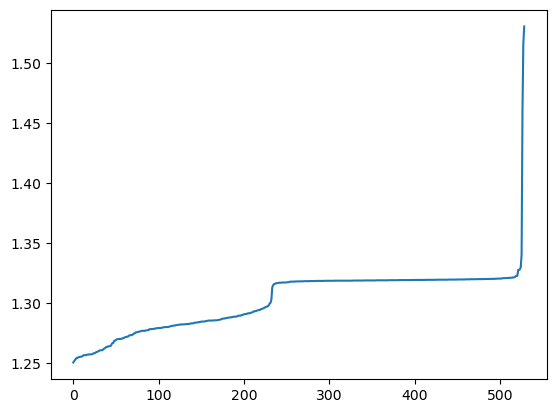

In [168]:
binomial_bond_lengths = np.sort(bond_lengths['C - C , 2.0'][:,0])
plt.plot(binomial_bond_lengths)

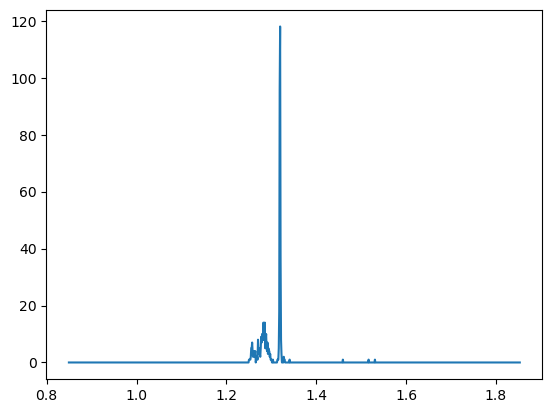

In [172]:
dist = np.histogram(binomial_bond_lengths, 1000, (0.8495, 1.8531))
plt.plot(np.linspace(0.8495, 1.8531, 1000), dist[0])

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

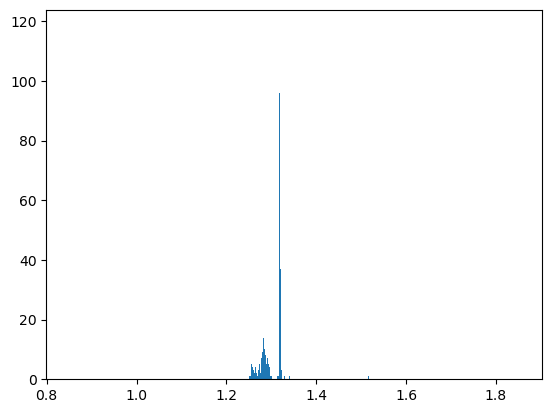

In [173]:
plt.hist(binomial_bond_lengths, 1000, (0.8495, 1.8531))

In [12]:
re.split(',| ', 'C - H , 1')

['C', '-', 'H', '', '', '1']

In [178]:
''' The format of the pandas data frame is going to be:-
no. of entries, firstElement, secondElement, bondOrder, 
meanBondLength, stdBondLength, minBondLength, maxBondLength and index same as key'''

list_bond_length = []

for key in bond_lengths.keys():
    bond = re.split(',| ', key)
    bondOrder = bond[-1]
    firstElement = bond[0]
    secondElement = bond[2]
    
    length = bond_lengths[key][:,0]
    new_row = {'No. of entries':len(length), 'key': key, '1st Element':firstElement, '2nd Element':secondElement, 'Bond Order':bondOrder, 
               'Mean Bond Length':length.mean(), 'Std dev Bond Length': length.std(),
               'Max Bond Length': length.max(), 'Min Bond Length': length.min()}
    
    list_bond_length.append(new_row)
    
df = pd.DataFrame(list_bond_length)

In [179]:
pd.set_option('display.max_rows', df.shape[0]+1)
df

,No. of entries,key,1st Element,2nd Element,Bond Order,Mean Bond Length,Std dev Bond Length,Max Bond Length,Min Bond Length
0,14228,"C - H , 1.0",C,H,1.0,1.089025,0.006296,1.1479,0.9598
1,13696,"Car - H , 1.0",Car,H,1.0,1.078993,0.004023,1.0861,0.8477
2,869,"C - Nar , 1.0",C,Nar,1.0,1.439020,0.010105,1.4815,1.3916
3,10412,"Car - Car , 1.5",Car,Car,1.5,1.378472,0.004881,1.5023,1.3021
4,13246,"Car - Car , 1.4",Car,Car,1.4,1.387439,0.005400,1.4999,1.3311
5,447,"Car - Nar , 1.0",Car,Nar,1.0,1.409591,0.011546,1.4693,1.3857
6,63,"Nar - Nar , 1.0",Nar,Nar,1.0,1.390403,0.008509,1.4079,1.3518
7,1149,"Car - Nar , 1.1",Car,Nar,1.1,1.385238,0.010397,1.4282,1.3443
8,270,"Car - O , 1.6",Car,O,1.6,1.218273,0.008816,1.2447,1.2021
9,2169,"Car - Car , 1.1",Car,Car,1.1,1.451733,0.013135,1.6045,1.3939


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1142 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No. of entries       1142 non-null   int64  
 1   key                  1142 non-null   object 
 2   1st Element          1142 non-null   object 
 3   2nd Element          1142 non-null   object 
 4   Bond Order           1142 non-null   object 
 5   Mean Bond Length     1142 non-null   float64
 6   Std dev Bond Length  1142 non-null   float64
 7   Max Bond Length      1142 non-null   float64
 8   Min Bond Length      1142 non-null   float64
 9   1st atom             1142 non-null   int64  
 10  2nd atom             1142 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 107.1+ KB


In [248]:
# Changing the data type of column
df = df.astype({'Bond Order':np.float32, '1st atom':np.int64, '1st atom':np.int64})

# Removing any rows with 0 bond order
df = df[df['Bond Order']!=0.0]

## Defining the required parameters

In [180]:
specialElements = ['Car', 'Nar', 'Nam', 'Npl', 'Ntr', 'HO', 'Sac', 'So', 'O.co', 'Cac', 
                   'Nox', 'N+', 'P+', 'O-', 'C+', 'Ng+', 'Sox', 'Pac', 'C-', 'S+']

In [181]:
electronegativity = [
    0.00, 2.20, 0.00, 0.98, 1.57, 2.04, 2.55, 3.04, 3.44, 3.98, 0.00, 0.93, 1.31, 1.61, 1.90, 2.19,
    2.58, 3.16, 0.00, 0.82, 1.00, 1.36, 1.54, 1.63, 1.66, 1.55, 1.83, 1.91, 1.88, 1.90, 1.65,
    1.81, 2.01, 2.18, 2.55, 2.96, 0.00, 0.82, 0.95, 1.22, 1.33, 1.60, 2.16, 1.90, 2.20, 2.28,
    2.20, 1.93, 1.69, 1.78, 1.96, 2.05, 2.10, 2.66, 0.00, 0.79, 0.89, 1.10, 1.12, 1.13, 1.14,
    1.13, 1.17, 1.20, 1.20, 1.20, 1.22, 1.23, 1.24, 1.25, 1.10, 1.27, 1.30, 1.50, 2.36, 1.90,
    2.20, 2.20, 2.28, 2.54, 2.00, 1.62, 2.33, 2.02, 2.00, 2.20, 0.00, 0.70, 0.90, 1.10, 1.30,
    1.50, 1.38, 1.36, 1.28, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30,
    1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30 
]

In [182]:
atomic_numbers = {
    'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5,  'C': 6,  'N': 7,  'O': 8,  'F': 9,  'Ne': 10, 
    'Na': 11, 'Mg': 12,'Al': 13,'Si': 14,'P': 15, 'S': 16, 'Cl': 17, 'Ar': 18, 'K': 19, 
    'Ca': 20, 'Sc': 21, 'Ti': 22, 'V': 23, 'Cr': 24, 'Mn': 25, 'Fe': 26, 'Co': 27, 'Ni': 28,
    'Cu': 29, 'Zn': 30, 'Ga': 31, 'Ge': 32, 'As': 33, 'Se': 34, 'Br': 35, 'Kr': 36, 'Rb': 37,
    'Sr': 38, 'Y': 39, 'Zr': 40, 'Nb': 41, 'Mo': 42, 'Tc': 43, 'Ru': 44, 'Rh': 45, 'Pd': 46, 
    'Ag': 47, 'Cd': 48, 'In': 49, 'Sn': 50, 'Sb': 51, 'Te': 52, 'I': 53, 'Xe': 54, 'Cs': 55,
    'Ba': 56, 'La': 57, 'Ce': 58, 'Pr': 59, 'Nd': 60, 'Pm': 61, 'Sm': 62, 'Eu': 63, 'Gd': 64,
    'Tb': 65, 'Dy': 66, 'Ho': 67, 'Er': 68, 'Tm': 69, 'Yb': 70, 'Lu': 71, 'Hf': 72, 'Ta': 73,
    'W': 74,  'Re': 75, 'Os': 76, 'Ir': 77, 'Pt': 78, 'Au': 79, 'Hg': 80, 'Tl': 81, 'Pb': 82,
    'Bi':83, 'Po': 84, 'At': 85, 'Rn': 86, 'Fr': 87, 'Ra': 88, 'Ac': 89, 'Th': 90, 'Pa': 91,
    'U': 92, 'Np': 93,'Pu': 94,'Am': 95,'Cm': 96,'Bk': 97,'Cf': 98,'Es': 99,'Fm': 100, 'Md': 101, 
    'No': 102, 'Lr': 103, 'Rf': 104, 'Db': 105, 'Sg': 106, 'Bh': 107, 'Hs': 108, 'Mt': 109, 
    'Ds': 110, 'Rg': 111, 'Cn': 112, 'Nh': 113, 'Fl': 114, 'Mc': 115, 'Lv': 116, 'Ts': 117, 'Og': 118
}

In [183]:
covalent_radii = [
  # Dummy, 1st row
  0.18, 0.32, 0.46,
  # 2nd row
  1.33, 1.02, 0.85, 0.75, 0.71, 0.63, 0.64, 0.67,
  # 3rd row
  1.55, 1.39, 1.26, 1.16, 1.11, 1.03, 0.99, 0.96,
  # 4th row K, Ca
  1.96, 1.71,
  # 1st row TM (Sc.. Zn)
  1.48, 1.36, 1.34, 1.22, 1.19, 1.16, 1.11, 1.10, 1.12, 1.18,
  # 4th row p-block (Ga..Kr)
  1.24, 1.21, 1.21, 1.16, 1.14, 1.17,
  # 5th row Rb, Sr
  2.10, 1.85,
  # 2nd row TM (Y..Cd)
  1.63, 1.54, 1.47, 1.38, 1.28, 1.25, 1.25, 1.20, 1.28, 1.36,
  # 5th row p-block (In..Xe)
  1.42, 1.40, 1.40, 1.36, 1.33, 1.31,
  # 6th row Cs, Ba
  2.32, 1.96,
  # Lanthanides La..Gd
  1.80, 1.63, 1.76, 1.74, 1.73, 1.72, 1.68,
  # Lanthanides Tb..Yb
  1.69, 1.68, 1.67, 1.66, 1.65, 1.64, 1.70,
  # 3rd row TM (Lu..Hg)
  1.62, 1.52, 1.46, 1.37, 1.31, 1.29, 1.22, 1.23, 1.24, 1.33,
  # 6th row p-block (Tl..Rn)
  1.44, 1.44, 1.51, 1.45, 1.47, 1.42,
  # 7th row Fr, Ra
  2.23, 2.01,
  # Actinides (Ac.. Am)
  1.86, 1.75, 1.69, 1.70, 1.71, 1.72, 1.66,
  # Actinides (Cm..No)
  1.66, 1.68, 1.68, 1.65, 1.67, 1.73, 1.76,
  # Trans-actinides
  1.61, 1.57, 1.49, 1.43, 1.41, 1.34, 1.29, 1.28, 1.21, 1.22, 1.36, 1.43, 1.62,
  1.75, 1.65, 1.57 ]

def estimate_bond_length(Z1 : int, Z2 : int, bond_order: float) -> float:
  """Estimate bond length between two atoms with atomic numbers Z1 and Z2
    and bond order bond_order
    Note that the bond order can be from a Wiberg bond order or Mayer bond order
    in which case, the order will be a float (e.g., 1.24 or 2.34) reflecting
    delocalization, etc.
    Args:
        Z1 (int): Atomic number of first atom
        Z2 (int): Atomic number of second atom
        bond_order (float): Bond order (1.0 for single bond, 2.0 for double bond, etc.)
  """
  single_bond = np.take(covalent_radii, Z1) + np.take(covalent_radii, Z2)
  # this is an empirical fit from internal data from the Hutchison group
  return single_bond * np.power(bond_order, -0.25)

In [184]:
def convertToAtomicNumber(atom: str) -> int:
    if atom in specialElements:
        return atomic_numbers[atom[0]]
    else:
        return atomic_numbers[atom]

In [203]:
df['1st atom'] = df["1st Element"].apply(convertToAtomicNumber)
df['2nd atom'] = df["2nd Element"].apply(convertToAtomicNumber)
#df['1st covalent radius'] = df['1st atom'].apply(lambda x: covalent_radii[x])
#df['2nd covalent radius'] = df['2nd atom'].apply(lambda x: covalent_radii[x])
df

,No. of entries,key,1st Element,2nd Element,Bond Order,Mean Bond Length,Std dev Bond Length,Max Bond Length,Min Bond Length,1st atom,2nd atom
0,14228,"C - H , 1.0",C,H,1.0,1.089025,0.006296,1.1479,0.9598,6,1
1,13696,"Car - H , 1.0",Car,H,1.0,1.078993,0.004023,1.0861,0.8477,6,1
2,869,"C - Nar , 1.0",C,Nar,1.0,1.439020,0.010105,1.4815,1.3916,6,7
3,10412,"Car - Car , 1.5",Car,Car,1.5,1.378472,0.004881,1.5023,1.3021,6,6
4,13246,"Car - Car , 1.4",Car,Car,1.4,1.387439,0.005400,1.4999,1.3311,6,6
5,447,"Car - Nar , 1.0",Car,Nar,1.0,1.409591,0.011546,1.4693,1.3857,6,7
6,63,"Nar - Nar , 1.0",Nar,Nar,1.0,1.390403,0.008509,1.4079,1.3518,7,7
7,1149,"Car - Nar , 1.1",Car,Nar,1.1,1.385238,0.010397,1.4282,1.3443,6,7
8,270,"Car - O , 1.6",Car,O,1.6,1.218273,0.008816,1.2447,1.2021,6,8
9,2169,"Car - Car , 1.1",Car,Car,1.1,1.451733,0.013135,1.6045,1.3939,6,6


In [21]:
#Reordering Pandas DataFrame columns

cols = ['No. of entries', '1st Element', '2nd Element', 'Bond Order', 'Mean Bond Length', 
        'Std dev Bond Length', 'Max Bond Length', 'Min Bond Length', '1st atom', '2nd atom']

In [249]:
Accuracy = []

result = estimate_bond_length(df['1st atom'].to_numpy(), df['2nd atom'].to_numpy(), df['Bond Order'].to_numpy())
Accuracy = np.sqrt(np.square(result - df['Mean Bond Length'].to_numpy()))

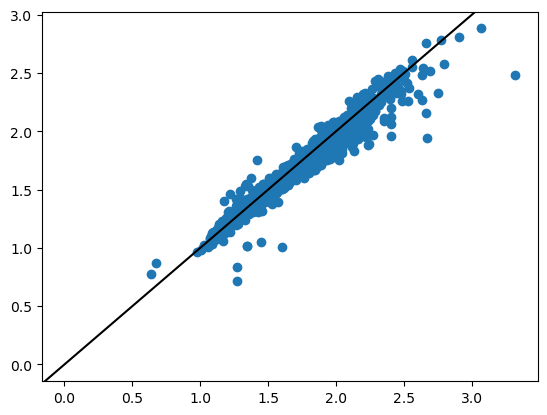

In [250]:
fig, ax = plt.subplots()
ax.axline((0, 0), slope=1, color='black')
ax.scatter(result, df['Mean Bond Length'].to_numpy())

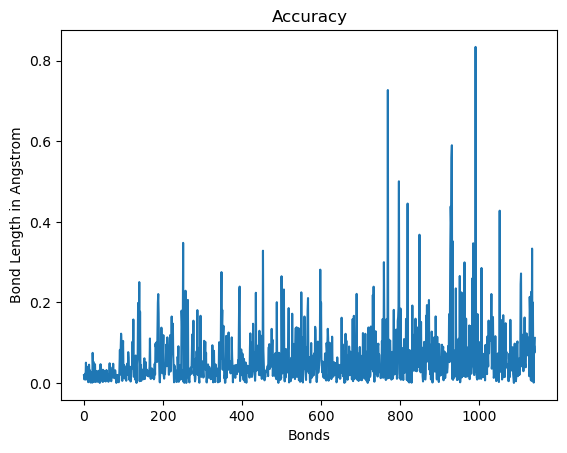

In [196]:
plt.xlabel('Bonds')
plt.ylabel('Bond Length in Angstrom')
plt.title('Accuracy')
plt.plot(Accuracy)

In [197]:
Accuracy.mean()

0.06080288938625969

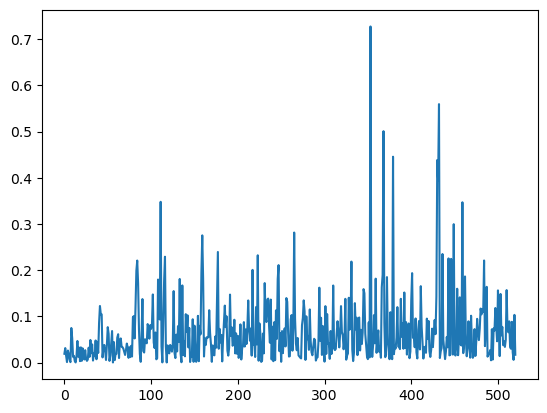

In [198]:
accuracy=[]

for index, row in df.iterrows():
    if(not(row['1st Element'] in specialElements or row['2nd Element'] in specialElements)):
        accuracy.append(Accuracy[index])
    
plt.plot(accuracy)

In [199]:
print(np.std(accuracy))
np.mean(accuracy)

0.07489574930214951


0.06624584288225414

## Training ML Models

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [258]:
def DataLoader(NO_OF_TRAIN_SAMPLES = 10) -> (list, list):
    
    bonds = list(range(0, df.shape[0]))
    weights = df['No. of entries'].to_numpy()
    
    indexes = random.choices(bonds, weights, k = NO_OF_TRAIN_SAMPLES)
    train_X = []
    train_Y = []
    
    for i in indexes:
        entry = random.randrange(df.loc[i]["No. of entries"])
        atom1 = df.loc[i]['1st atom']
        atom2 = df.loc[i]['2nd atom']
        
        bond = bond_lengths[df.loc[i]['key']][entry]
                 
        train_X.append([atom1, atom2, covalent_radii[atom1], covalent_radii[atom2], electronegativity[atom1], 
                        electronegativity[atom2], bond[1], bond[2], bond[-1], np.power(bond[-1],-0.25)])        
        train_Y.append([bond[0]])
                 
    return (np.array(train_X), np.array(train_Y))

DataLoader()

(array([[ 6.00000000e+00,  1.00000000e+00,  7.50000000e-01,
          3.20000000e-01,  2.55000000e+00,  2.20000000e+00,
         -1.51816371e-01,  4.24291541e-02,  9.70000000e-01,
          1.00764387e+00],
        [ 6.00000000e+00,  6.00000000e+00,  7.50000000e-01,
          7.50000000e-01,  2.55000000e+00,  2.55000000e+00,
         -3.87548858e-02, -4.76219310e-02,  1.45000000e+00,
          9.11292927e-01],
        [ 6.00000000e+00,  8.00000000e+00,  7.50000000e-01,
          6.30000000e-01,  2.55000000e+00,  3.44000000e+00,
          1.47471396e-01, -2.59223271e-01,  1.08000000e+00,
          9.80943652e-01],
        [ 1.00000000e+00,  8.00000000e+00,  3.20000000e-01,
          6.30000000e-01,  2.20000000e+00,  3.44000000e+00,
         -4.44887079e-01,  2.87671508e-01,  9.00000000e-01,
          1.02669010e+00],
        [ 6.00000000e+00,  7.00000000e+00,  7.50000000e-01,
          7.10000000e-01,  2.55000000e+00,  3.04000000e+00,
         -8.60618066e-03,  5.37389110e-01,  1.000000

In [262]:
# Split the data into input features (X) and target variable (y)
# Input data format ['atomic number'*2, 'covalent_radius'*2, 'electronegativity'*2, 
#  partial_charge*2, 'bond_order'] 

X_train, Y_train = DataLoader(30000)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2)
Y_train = Y_train.flatten()

### ML Baseline

In [263]:
# Initialize the models
linear_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

poly=PolynomialFeatures(degree=2, include_bias=False)
Polyregr = LinearRegression()


# Train the models
linear_model.fit(X_train, Y_train)
dt_model.fit(X_train, Y_train)
rf_model.fit(X_train, Y_train)

poly_features=poly.fit_transform(X_train)
Polyregr.fit(poly_features, Y_train)


# Make predictions on the test set
linear_preds = linear_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

poly_xTest=poly.fit_transform(X_test)
poly_preds=Polyregr.predict(poly_xTest)

custom_formula_preds = estimate_bond_length(
    X_test[:,0].astype('int64'), X_test[:,1].astype('int64'), X_test[:,-2])


# Evaluate the models
custom_formula_mse = mean_squared_error(Y_test, custom_formula_preds)
custom_formula_r2 = r2_score(Y_test, custom_formula_preds)

linear_mse = mean_squared_error(Y_test, linear_preds)
linear_r2 = r2_score(Y_test, linear_preds)

dt_mse = mean_squared_error(Y_test, dt_preds)
dt_r2 = r2_score(Y_test, dt_preds)

rf_mse = mean_squared_error(Y_test, rf_preds)
rf_r2 = r2_score(Y_test, rf_preds)

poly_mse = mean_squared_error(Y_test, poly_preds)
poly_r2 = r2_score(Y_test, poly_preds)

# Print the evaluation metrics
print("Custom Formula:")
print("Mean Squared Error:", custom_formula_mse)
print("R-squared:", custom_formula_r2)
print()

print("Linear Regression:")
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)
print()

print("Polynomial Regression:")
print("Mean Squared Error:", poly_mse)
print("R-squared:", poly_r2)
print()

print("Decision Tree Regression:")
print("Mean Squared Error:", dt_mse)
print("R-squared:", dt_r2)
print()

print("Random Forest Regression:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)

Custom Formula:
Mean Squared Error: 0.0009781144016136841
R-squared: 0.9762843105661982

Linear Regression:
Mean Squared Error: 0.0005549770970961153
R-squared: 0.9865438393955857

Polynomial Regression:
Mean Squared Error: 0.0002603564781856495
R-squared: 0.9936873096147623

Decision Tree Regression:
Mean Squared Error: 0.0003844997
R-squared: 0.9906772914727091

Random Forest Regression:
Mean Squared Error: 0.0002583824696620003
R-squared: 0.9937351720866872


In [237]:
def ModelInsight(model):
    for i, pred in enumerate(model):
        print(X_test[i])
        print("Prediction: ", linear_preds[i])
        print("Actual Output: ", Y_test[i],"\n")

In [238]:
ModelInsight(linear_preds)

[ 6.          1.          0.75        0.32        2.55        2.2
  0.08621729 -0.04981672  0.97        1.00672353]
Prediction:  1.0858817748402172
Actual Output:  [1.0691] 

[ 6.          6.          0.75        0.75        2.55        2.55
 -0.05115331 -0.05083476  1.01        0.99781332]
Prediction:  1.494710349913093
Actual Output:  [1.5252] 

[ 6.00000000e+00  1.60000000e+01  7.50000000e-01  1.03000000e+00
  2.55000000e+00  2.58000000e+00 -2.57164617e-03  2.58627168e-02
  1.13000000e+00  9.73470382e-01]
Prediction:  1.7232180144770919
Actual Output:  [1.7431] 

[ 6.          8.          0.75        0.63        2.55        3.44
 -0.26284864  0.41982978  1.06        0.98726266]
Prediction:  1.3385522133288263
Actual Output:  [1.3473] 

[ 6.          6.          0.75        0.75        2.55        2.55
 -0.03368534 -0.03764355  1.51        0.91332442]
Prediction:  1.3648544800280102
Actual Output:  [1.3761] 

[ 6.          8.          0.75        0.63        2.55        3.44
  0.1083

In [239]:
ModelInsight(dt_preds)

[ 6.          1.          0.75        0.32        2.55        2.2
  0.08621729 -0.04981672  0.97        1.00672353]
Prediction:  1.0858817748402172
Actual Output:  [1.0691] 

[ 6.          6.          0.75        0.75        2.55        2.55
 -0.05115331 -0.05083476  1.01        0.99781332]
Prediction:  1.494710349913093
Actual Output:  [1.5252] 

[ 6.00000000e+00  1.60000000e+01  7.50000000e-01  1.03000000e+00
  2.55000000e+00  2.58000000e+00 -2.57164617e-03  2.58627168e-02
  1.13000000e+00  9.73470382e-01]
Prediction:  1.7232180144770919
Actual Output:  [1.7431] 

[ 6.          8.          0.75        0.63        2.55        3.44
 -0.26284864  0.41982978  1.06        0.98726266]
Prediction:  1.3385522133288263
Actual Output:  [1.3473] 

[ 6.          6.          0.75        0.75        2.55        2.55
 -0.03368534 -0.03764355  1.51        0.91332442]
Prediction:  1.3648544800280102
Actual Output:  [1.3761] 

[ 6.          8.          0.75        0.63        2.55        3.44
  0.1083

In [240]:
ModelInsight(rf_preds)

[ 6.          1.          0.75        0.32        2.55        2.2
  0.08621729 -0.04981672  0.97        1.00672353]
Prediction:  1.0858817748402172
Actual Output:  [1.0691] 

[ 6.          6.          0.75        0.75        2.55        2.55
 -0.05115331 -0.05083476  1.01        0.99781332]
Prediction:  1.494710349913093
Actual Output:  [1.5252] 

[ 6.00000000e+00  1.60000000e+01  7.50000000e-01  1.03000000e+00
  2.55000000e+00  2.58000000e+00 -2.57164617e-03  2.58627168e-02
  1.13000000e+00  9.73470382e-01]
Prediction:  1.7232180144770919
Actual Output:  [1.7431] 

[ 6.          8.          0.75        0.63        2.55        3.44
 -0.26284864  0.41982978  1.06        0.98726266]
Prediction:  1.3385522133288263
Actual Output:  [1.3473] 

[ 6.          6.          0.75        0.75        2.55        2.55
 -0.03368534 -0.03764355  1.51        0.91332442]
Prediction:  1.3648544800280102
Actual Output:  [1.3761] 

[ 6.          8.          0.75        0.63        2.55        3.44
  0.1083

In [246]:
np.abs(rf_preds-Y_test)

array([[4.17100e-03, 4.37934e-01, 6.74417e-01, ..., 7.54316e-01,
        1.16760e-02, 6.22052e-01],
       [4.51929e-01, 1.81660e-02, 2.18317e-01, ..., 2.98216e-01,
        4.44424e-01, 1.65952e-01],
       [6.69829e-01, 2.36066e-01, 4.17000e-04, ..., 8.03160e-02,
        6.62324e-01, 5.19480e-02],
       ...,
       [7.83229e-01, 3.49466e-01, 1.12983e-01, ..., 3.30840e-02,
        7.75724e-01, 1.65348e-01],
       [5.72900e-03, 4.28034e-01, 6.64517e-01, ..., 7.44416e-01,
        1.77600e-03, 6.12152e-01],
       [6.11629e-01, 1.77866e-01, 5.86170e-02, ..., 1.38516e-01,
        6.04124e-01, 6.25200e-03]])